#### Source: 
https://analyticsindiamag.com/complete-guide-to-bidirectional-lstm-with-python-codes/

In [1]:
import numpy as np
from keras.preprocessing import sequence
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.datasets import imdb 

Using TensorFlow backend.


use the IMDB data set for text classification using keras and bi-LSTM network 

In [2]:
n_unique_words = 10000 # cut texts after this number of words
maxlen = 200
batch_size = 128 

In [3]:
(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=n_unique_words)

C:\Users\18796\anaconda3\Lib\site-packages\keras\datasets\imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\18796\anaconda3\Lib\site-packages\keras\datasets\imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [4]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
y_train = np.array(y_train)
y_test = np.array(y_test) 

In [5]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(25000, 200) (25000, 200) (25000,) (25000,)


In [6]:
model = Sequential()
model.add(Embedding(n_unique_words, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [7]:
history=model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=12,
           validation_data=[x_test, y_test])
print(history.history['loss'])
print(history.history['accuracy']) 

Epoch 1/12
196/196 [==============================] - 241s 1s/step - loss: 0.4557 - accuracy: 0.7693 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/12
196/196 [==============================] - 231s 1s/step - loss: 0.2459 - accuracy: 0.9078 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/12
196/196 [==============================] - 289s 1s/step - loss: 0.1767 - accuracy: 0.9368 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/12
196/196 [==============================] - 246s 1s/step - loss: 0.1388 - accuracy: 0.9512 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/12
196/196 [==============================] - 254s 1s/step - loss: 0.1134 - accuracy: 0.9614 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/12
196/196 [==============================] - 259s 1s/step - loss: 0.0993 - accuracy: 0.9675 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/12
196/196 [==============================] - 258s 1s/step - loss: 0.0742 - accuracy: 

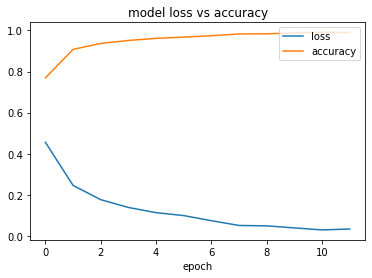

In [8]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['accuracy'])
pyplot.title('model loss vs accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['loss', 'accuracy'], loc='upper right')
pyplot.show() 